In [9]:
import re 
from textblob import TextBlob #Used to predict sentiment
import GetOldTweets3 as got #Used to retieve tweets
from matplotlib import pyplot as plt

In [21]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Rhea')\
                                           .setSince("2020-06-15")\
                                           .setUntil("2020-08-31")\
                                           .setLang('en')\
                                           .setMaxTweets(300)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

In [12]:
#Function to get the sentiment of the tweet
def get_sentiment(tweet): 
        result = TextBlob(preprocess_tweet(tweet)) 
        if result.sentiment.polarity > 0: 
            return 'Positive'
        elif result.sentiment.polarity == 0: 
            return 'Neutral'
        else: 
            return 'Negative'

#Function to clean the tweets like removing Hashtags, User Handles, Hyperlink
def preprocess_tweet(tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

In [22]:
#Storing the tweet and its sentiment
tweets=[]
for tw in tweet: 

  parsed_tweet = {}
  parsed_tweet['text'] = tw.text 
  parsed_tweet['sentiment'] =get_sentiment(tw.text) 
  if tw.retweets > 0: 
    if parsed_tweet not in tweets: 
      tweets.append(parsed_tweet) 
    else:
      tweets.append(parsed_tweet)

In [23]:
positive_tweets = [t for t in tweets if t['sentiment'] == 'Positive']
negative_tweets = [t for t in tweets if t['sentiment'] == 'Negative']
neutral_tweets=[t for t in tweets if t['sentiment']=='Neutral']
per_ptweets=len(positive_tweets)/len(tweets)*100
per_ntweets=len(negative_tweets)/len(tweets)*100
per_neutral=len(neutral_tweets)/len(tweets)*100
lab=['Positive','Negative','Neutral']
data=[per_ptweets,per_ntweets,per_neutral]

In [24]:
data

[52.459016393442624, 22.950819672131146, 24.59016393442623]

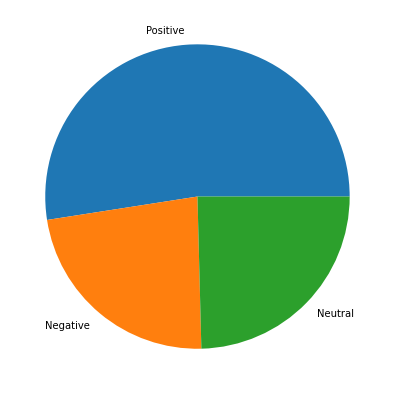

In [25]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = lab) 
plt.show()